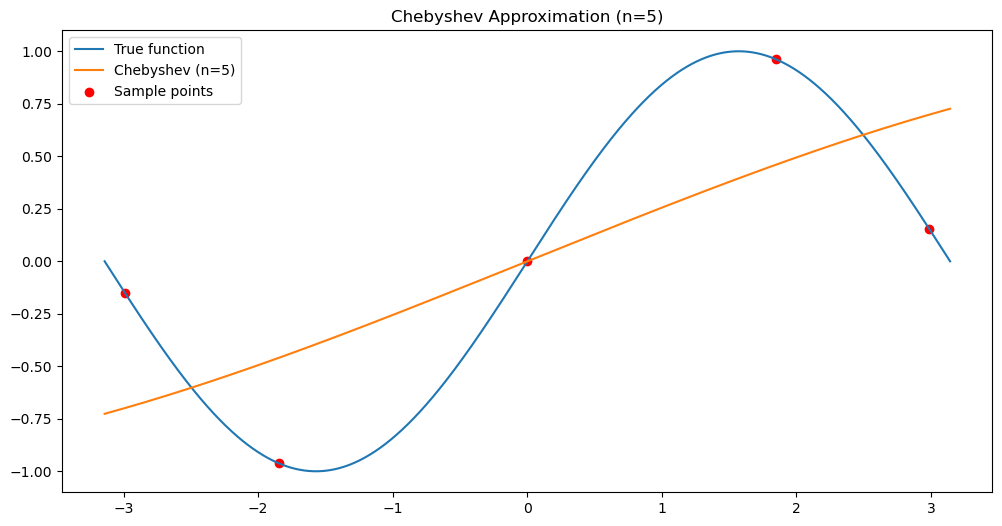

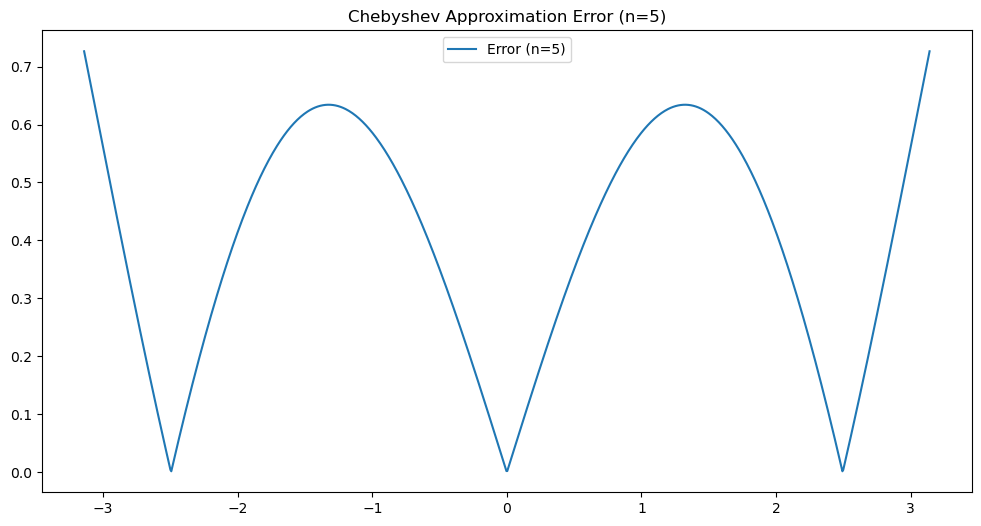

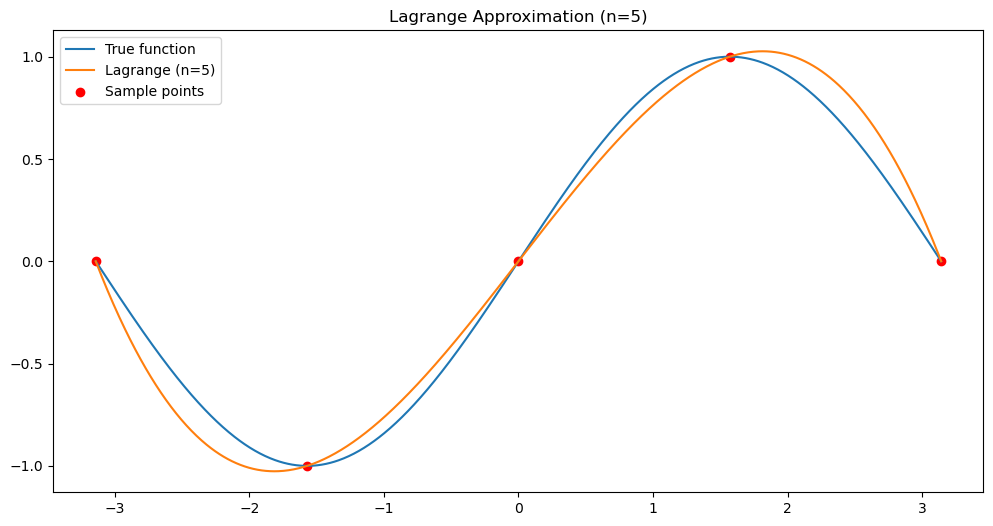

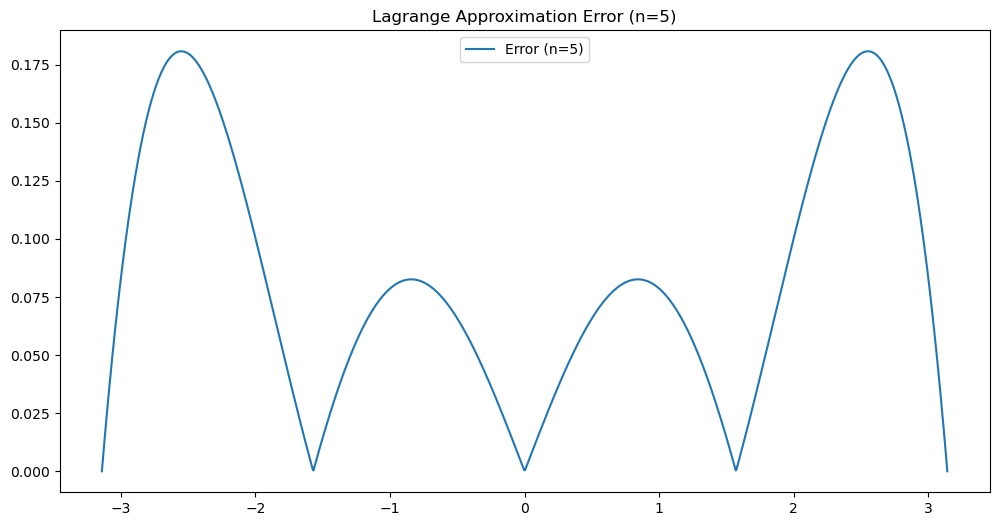

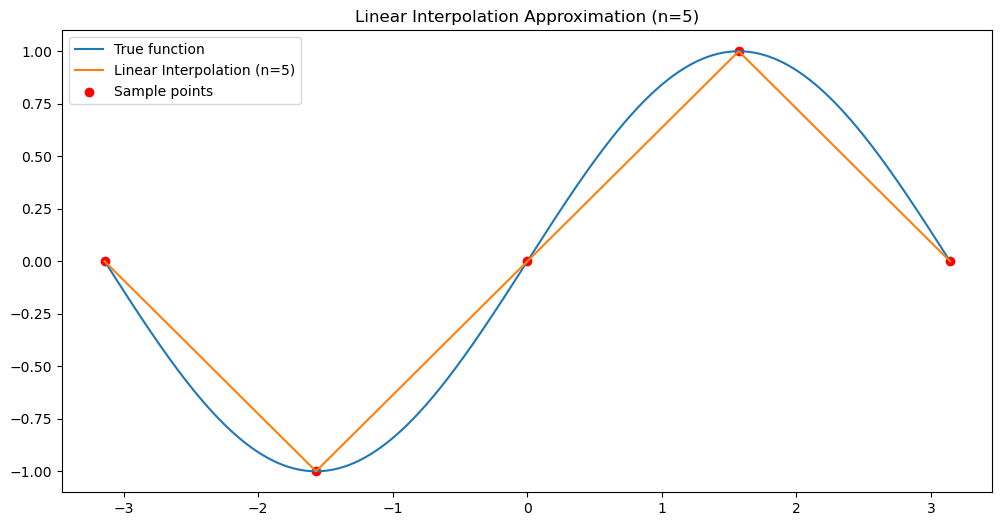

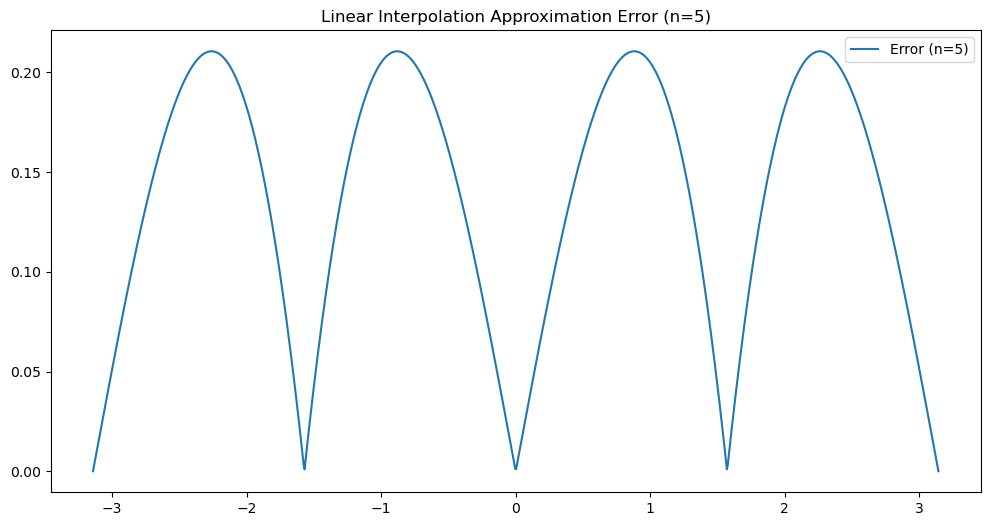

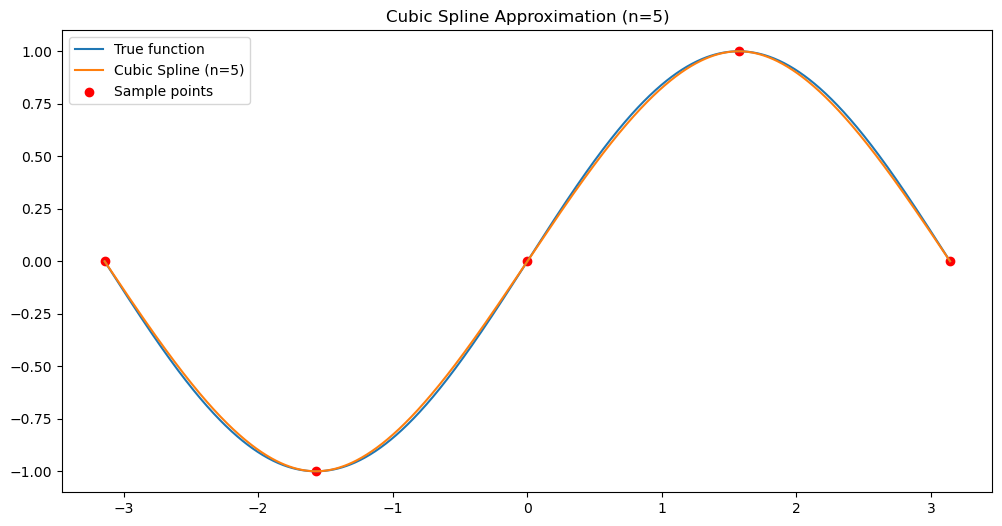

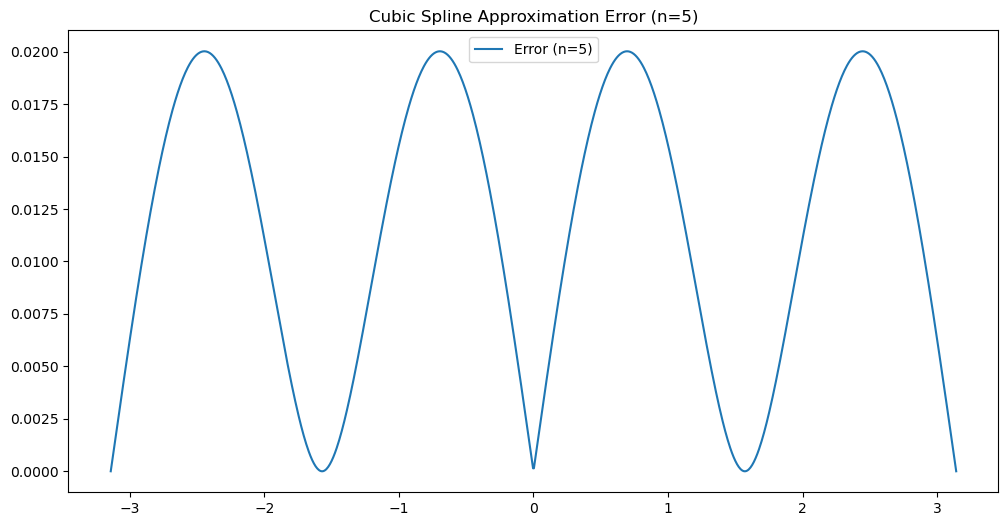

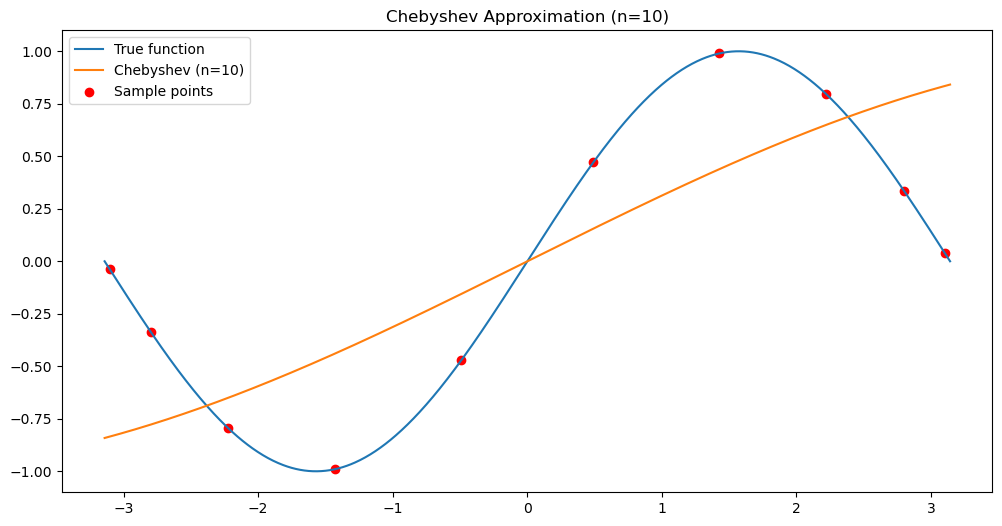

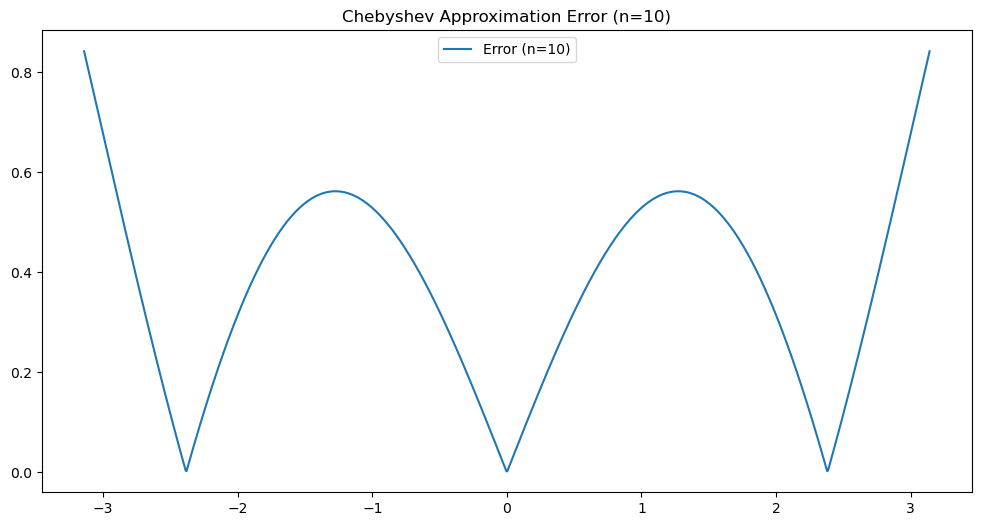

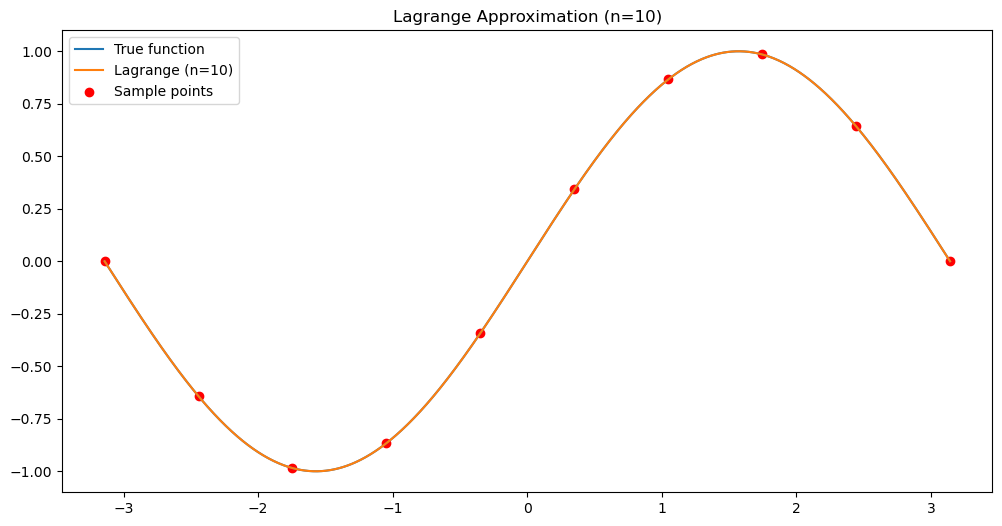

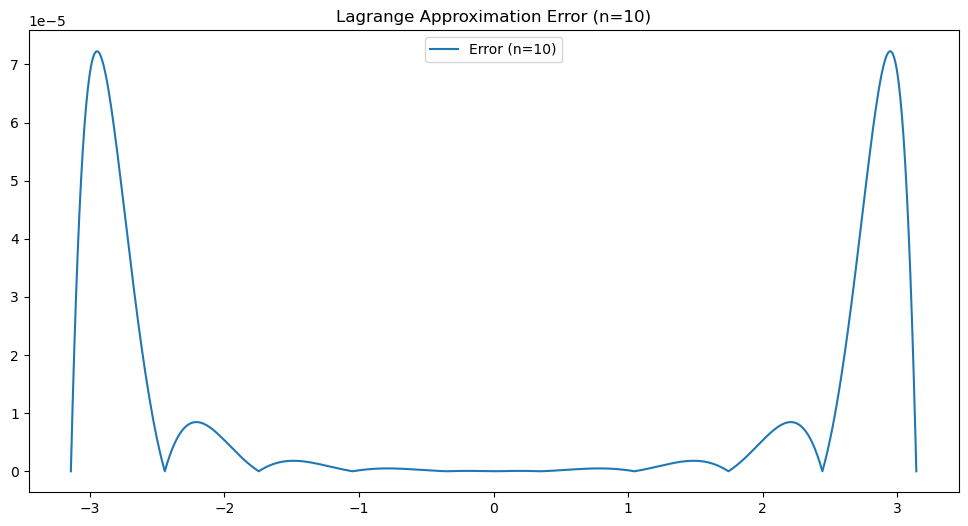

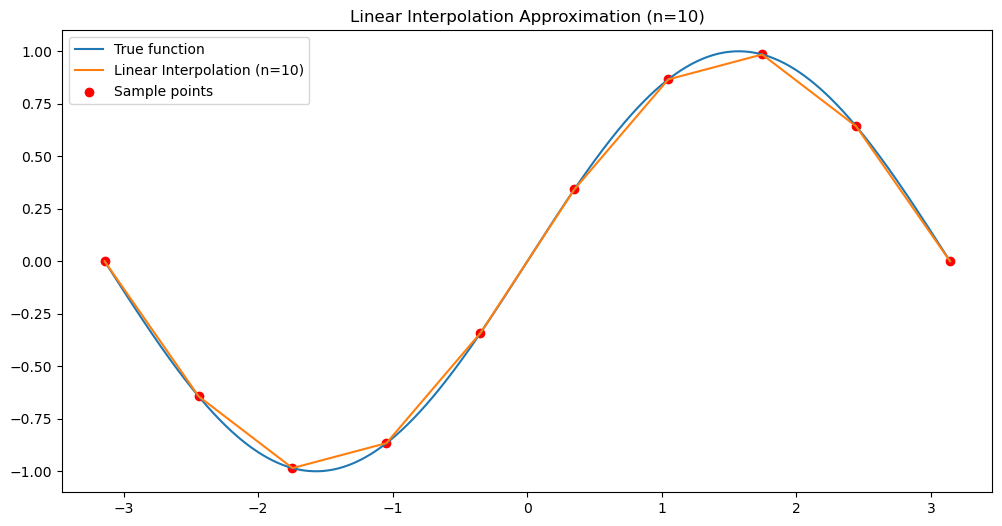

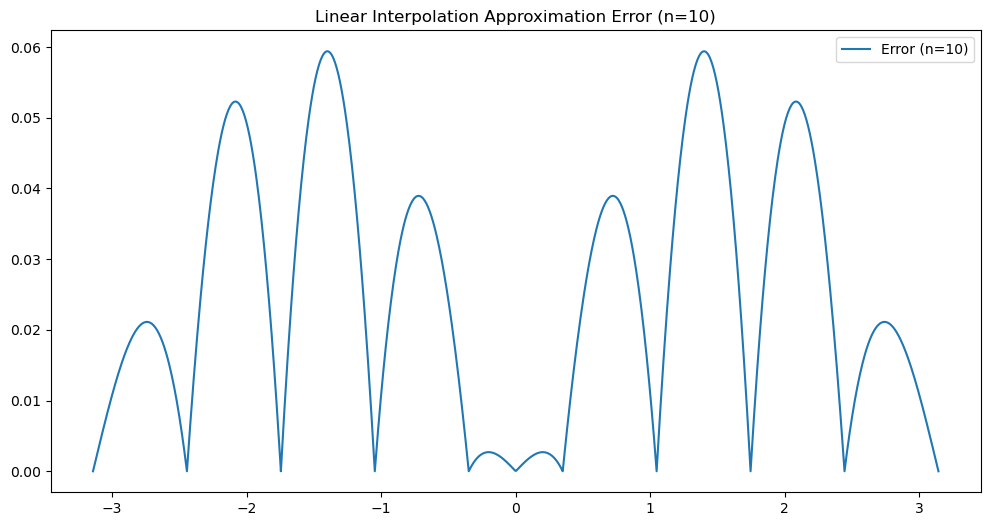

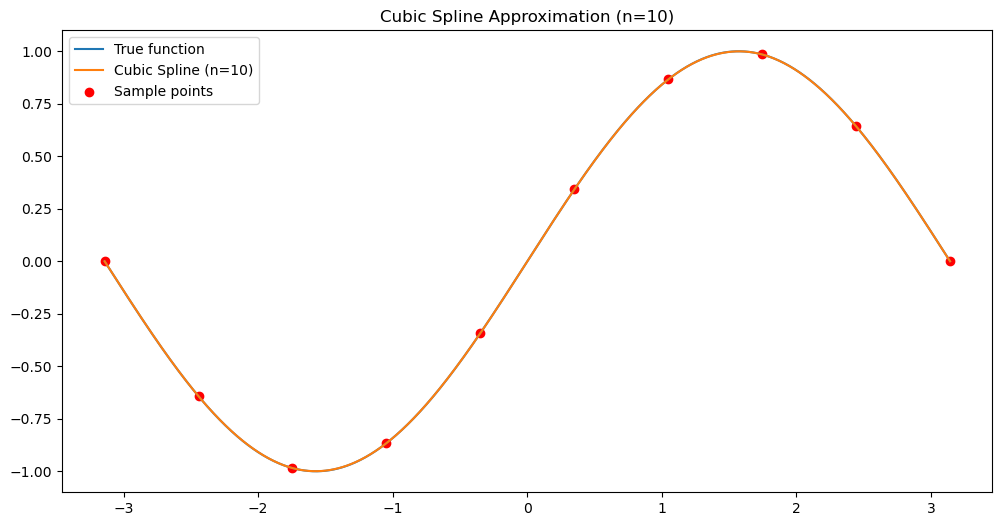

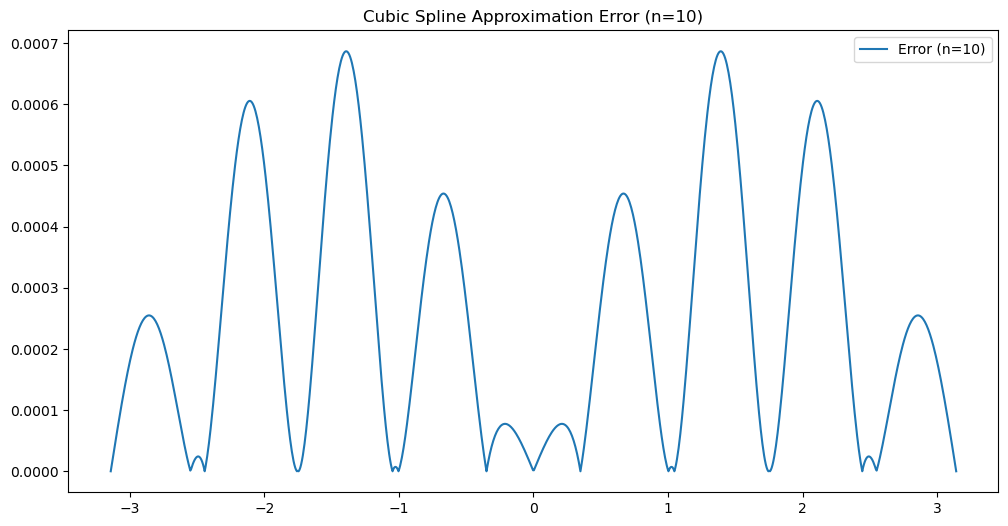

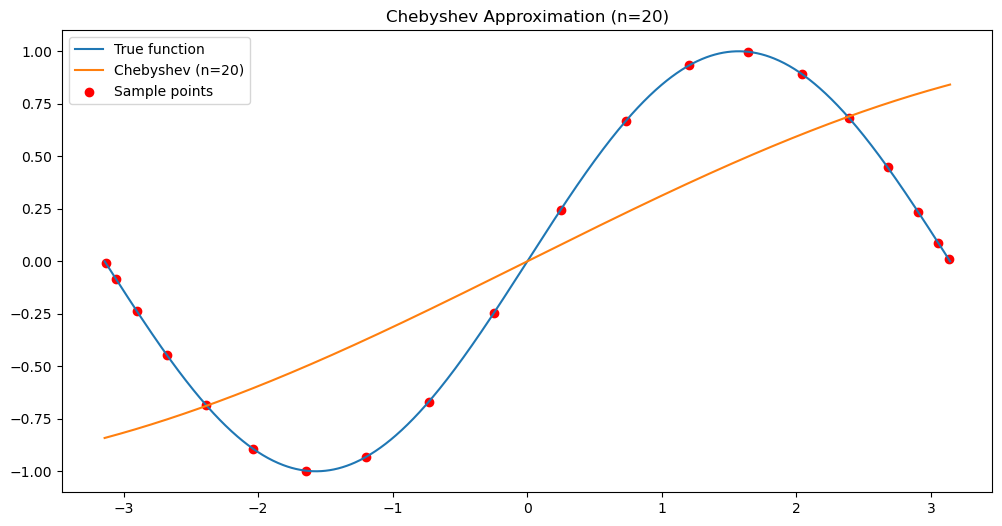

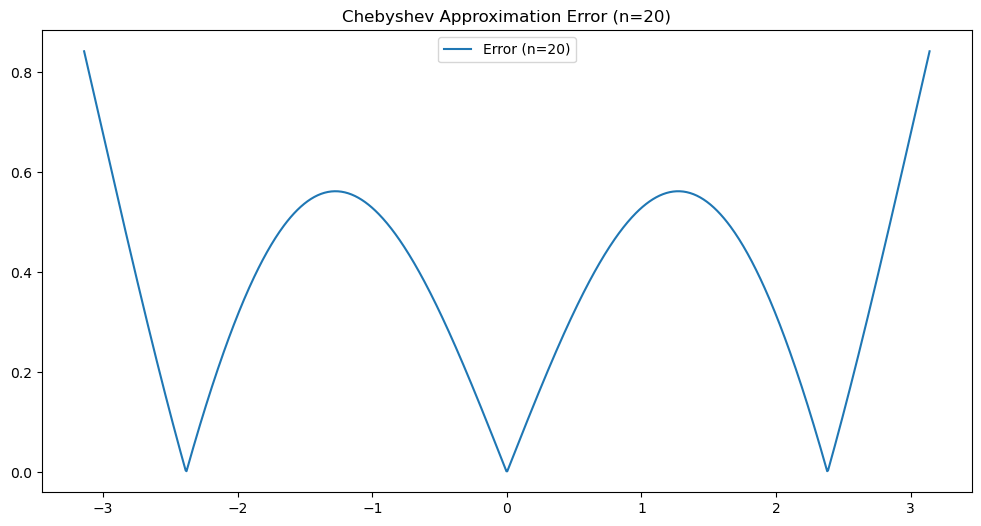

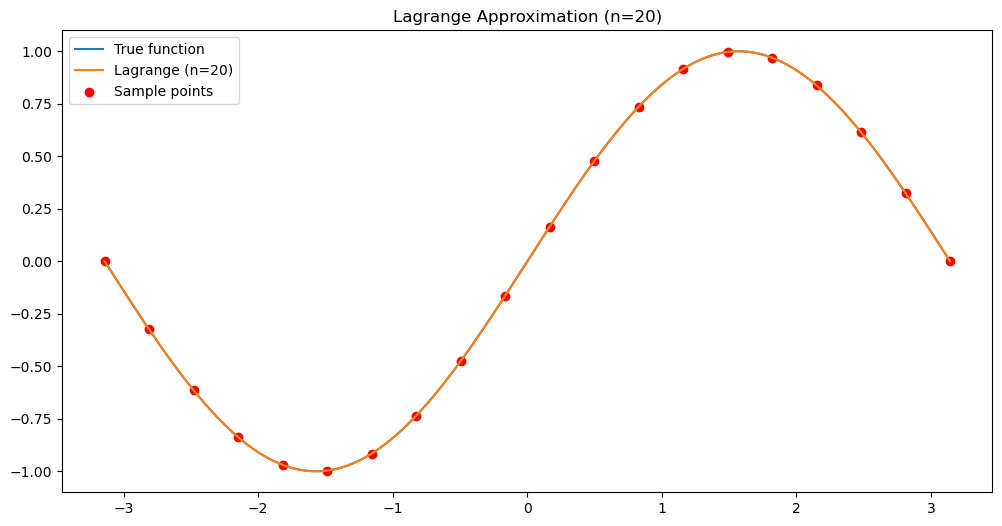

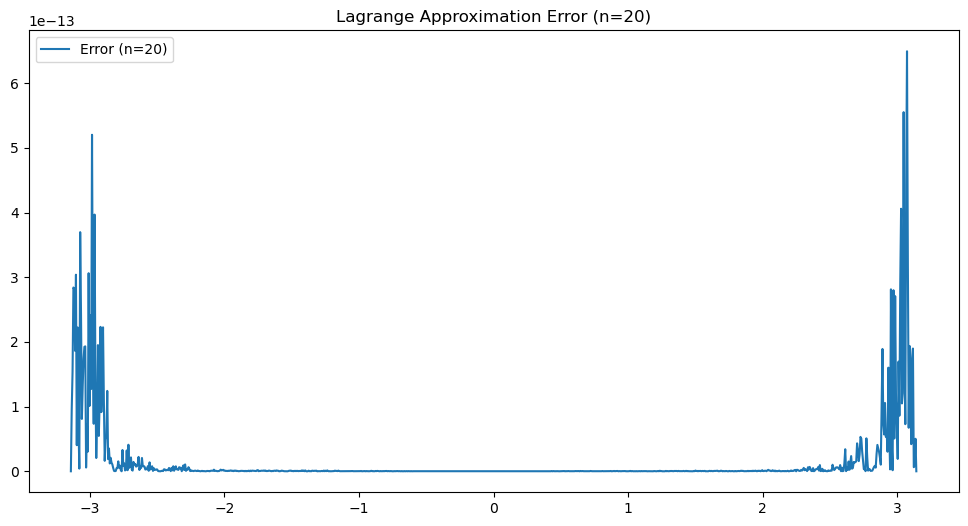

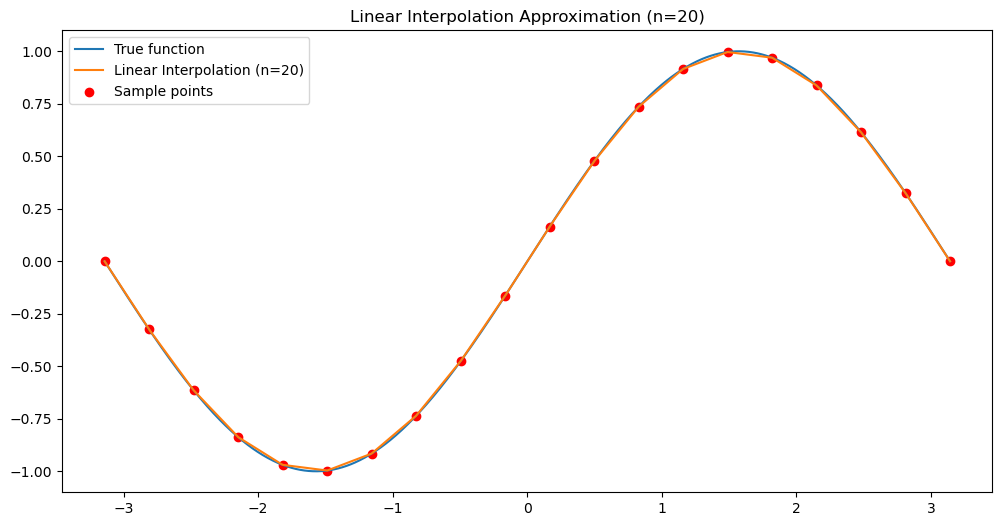

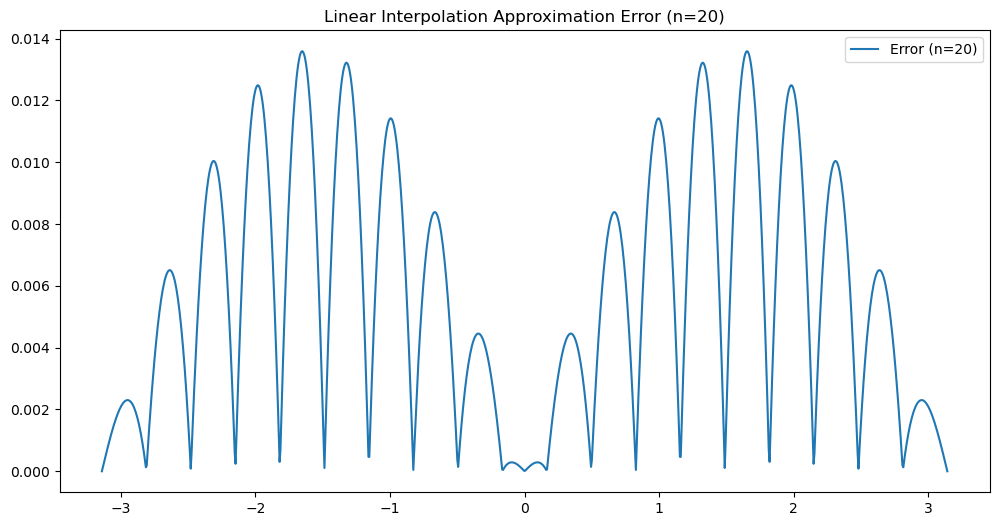

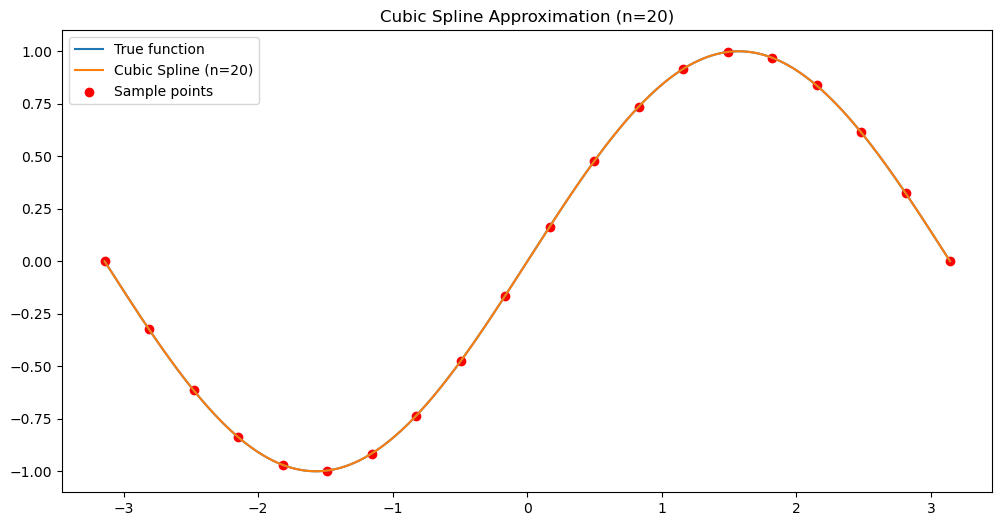

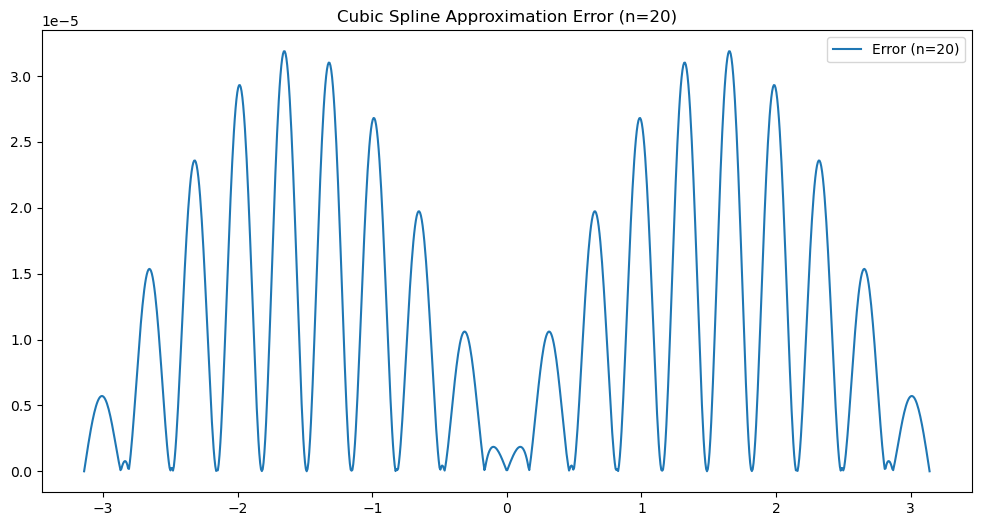

/Users/yufuchen/opt/anaconda3/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1670: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


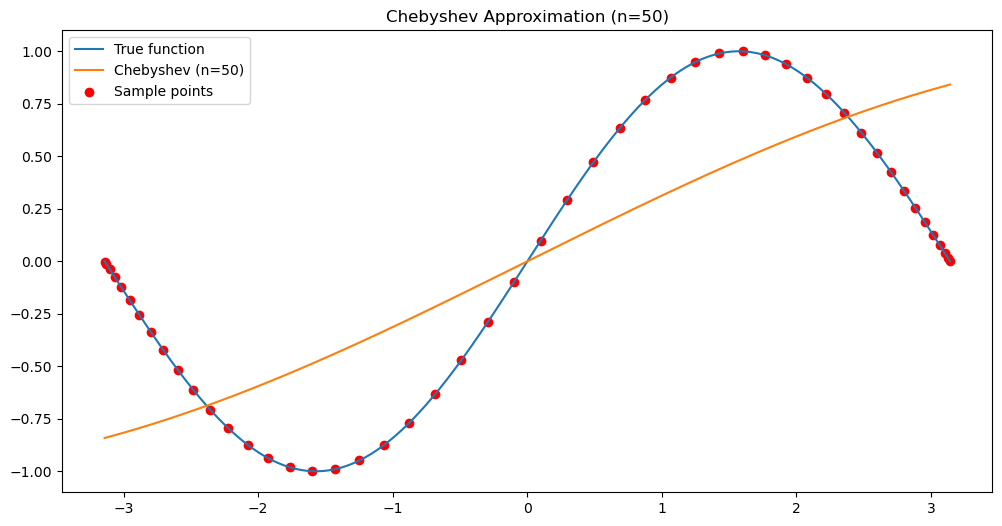

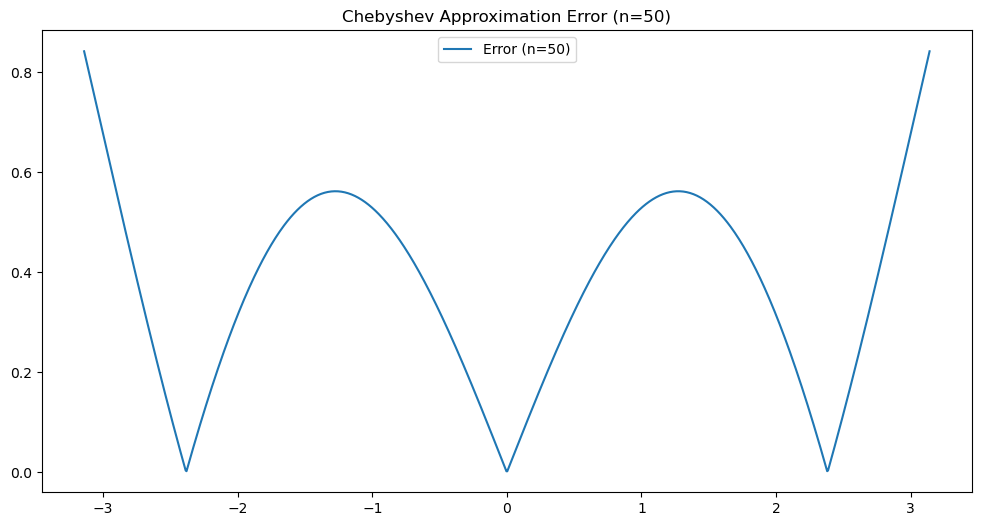

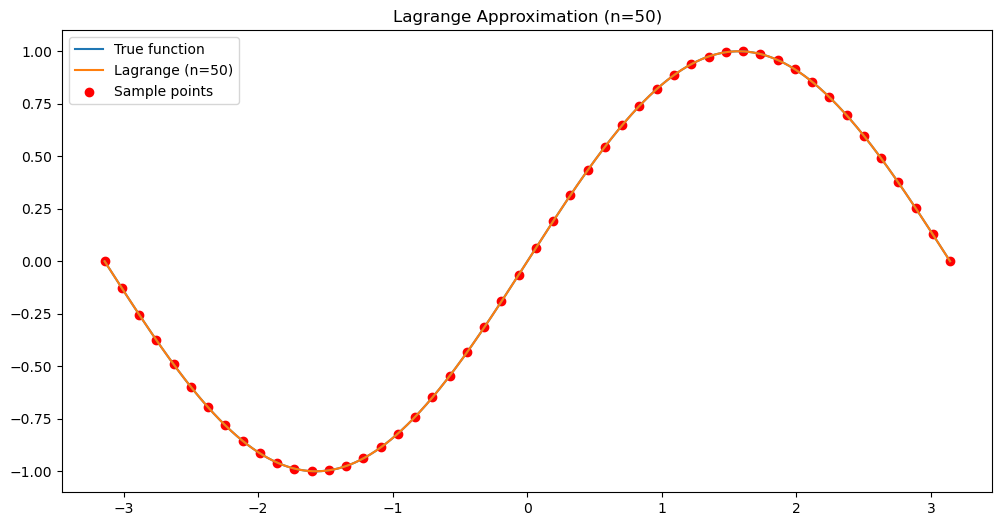

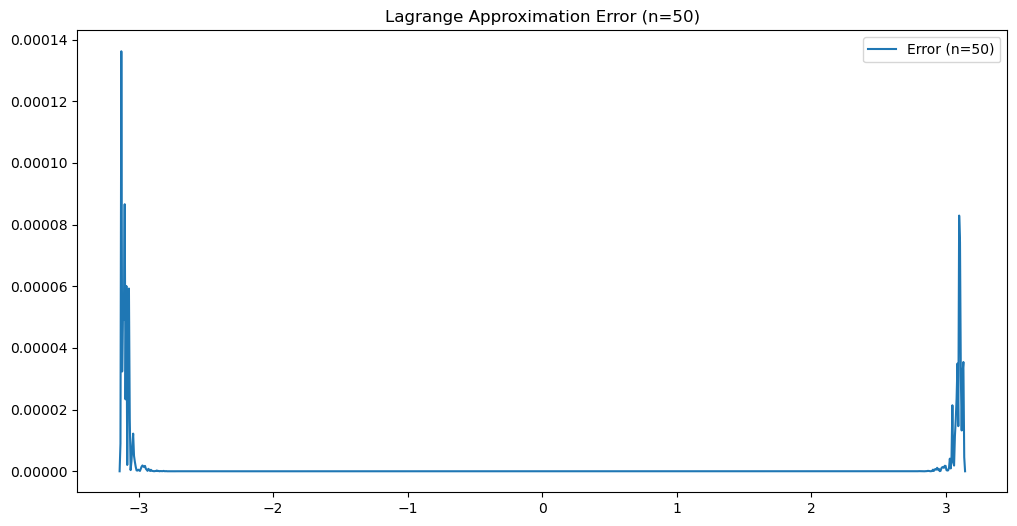

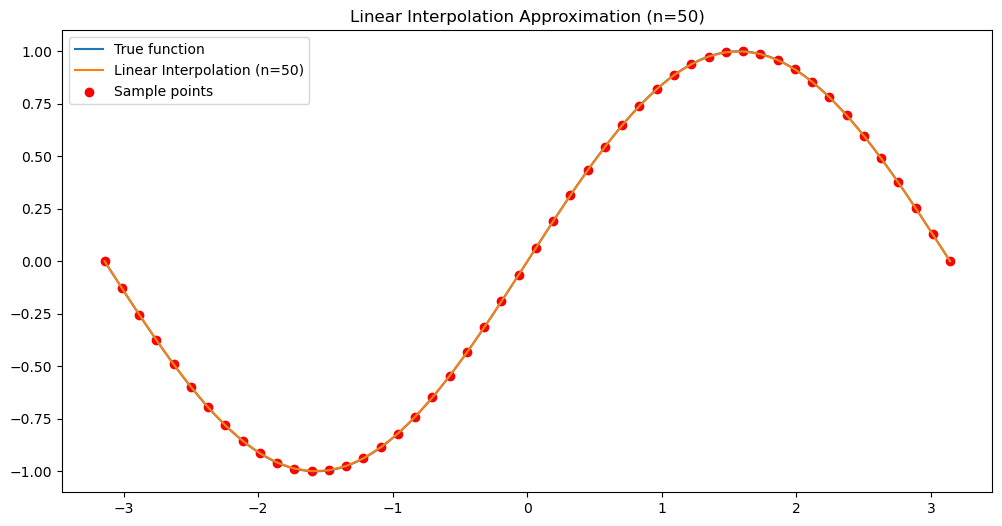

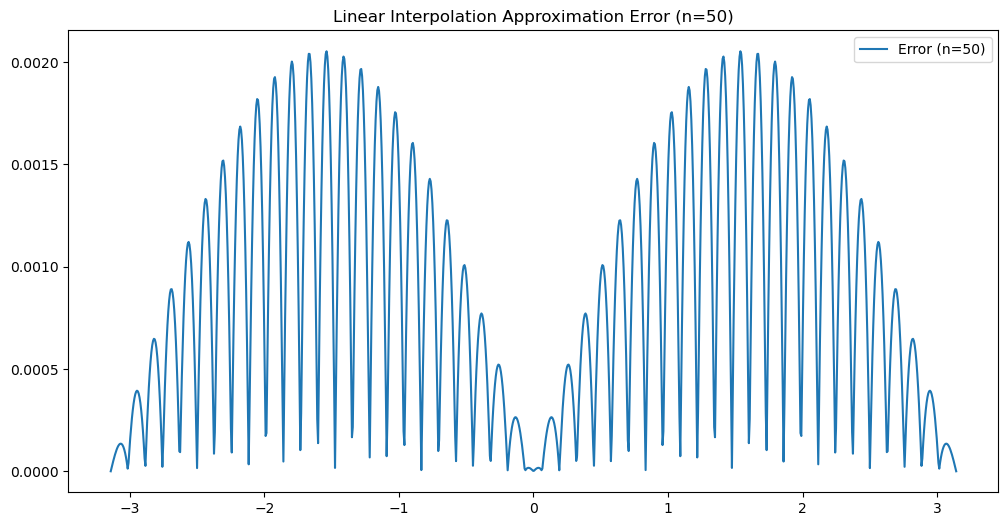

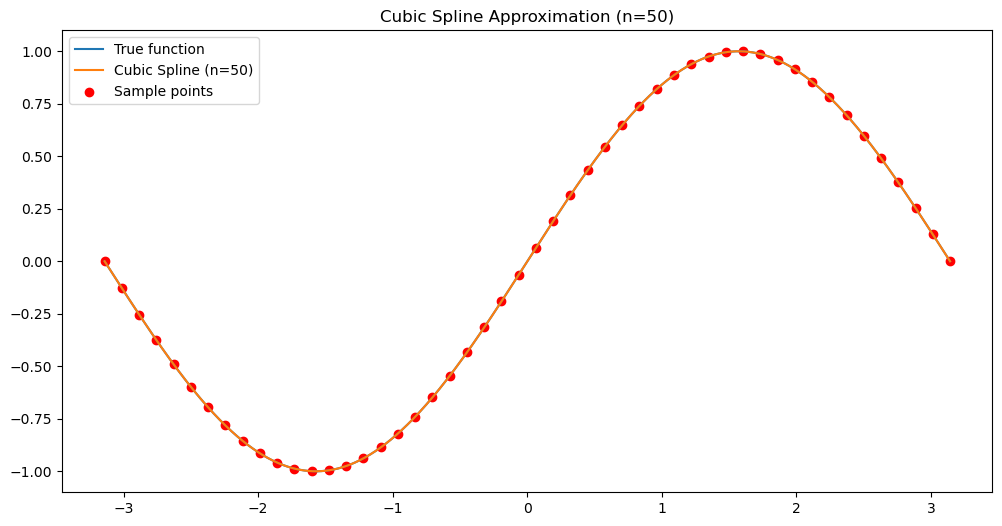

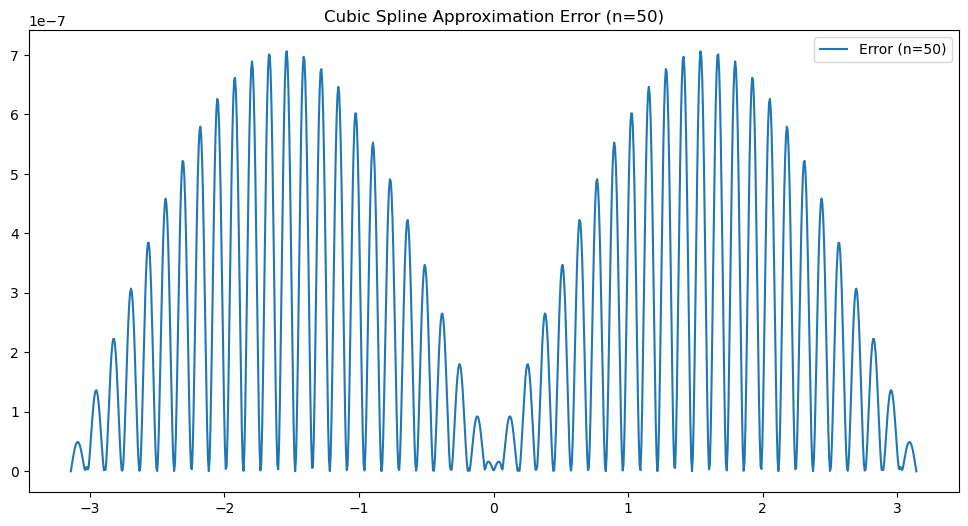

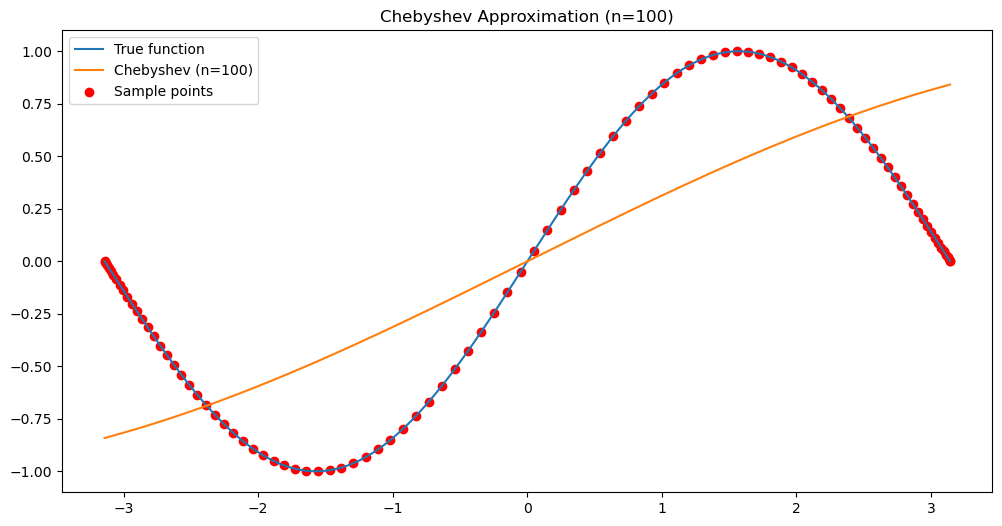

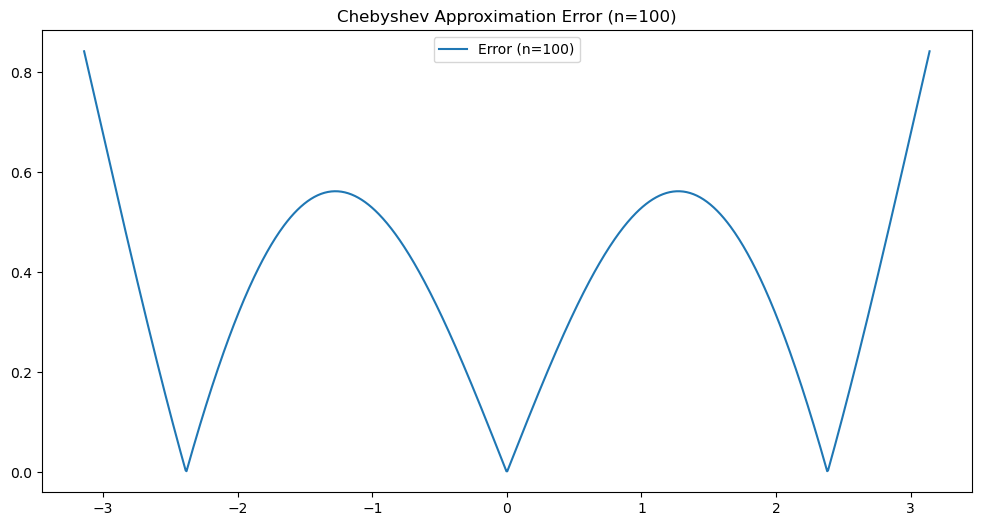

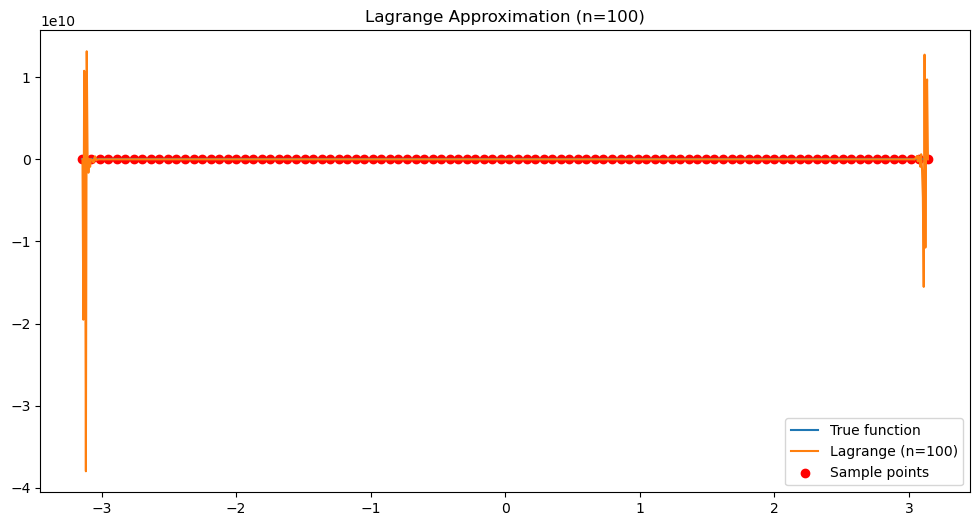

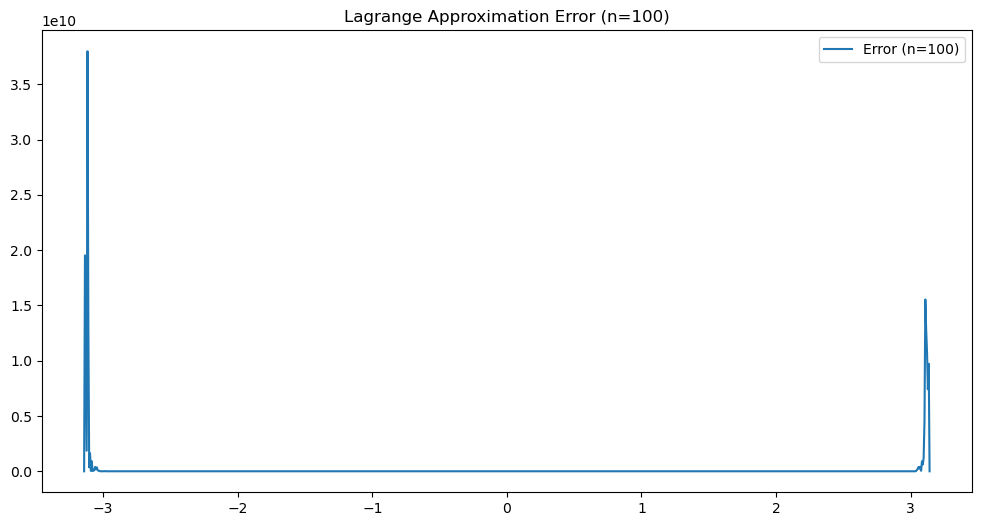

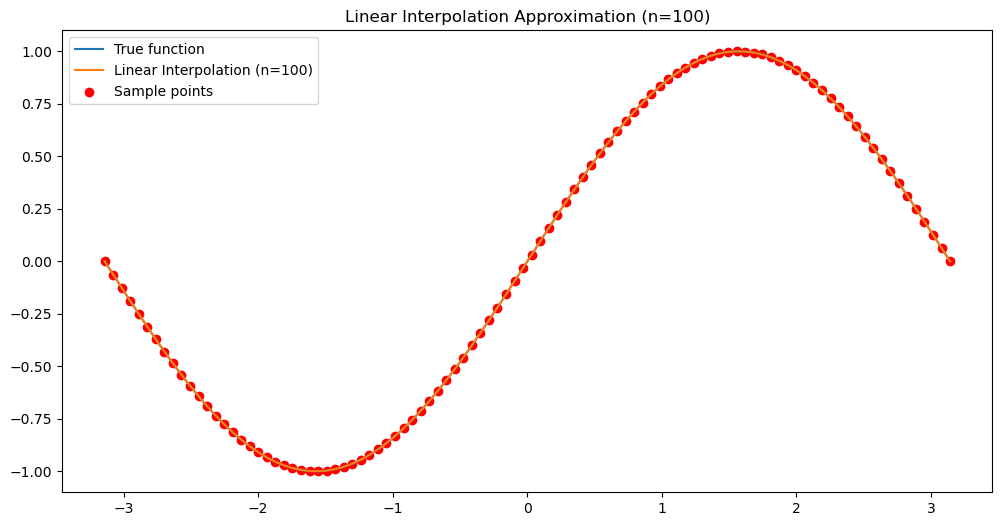

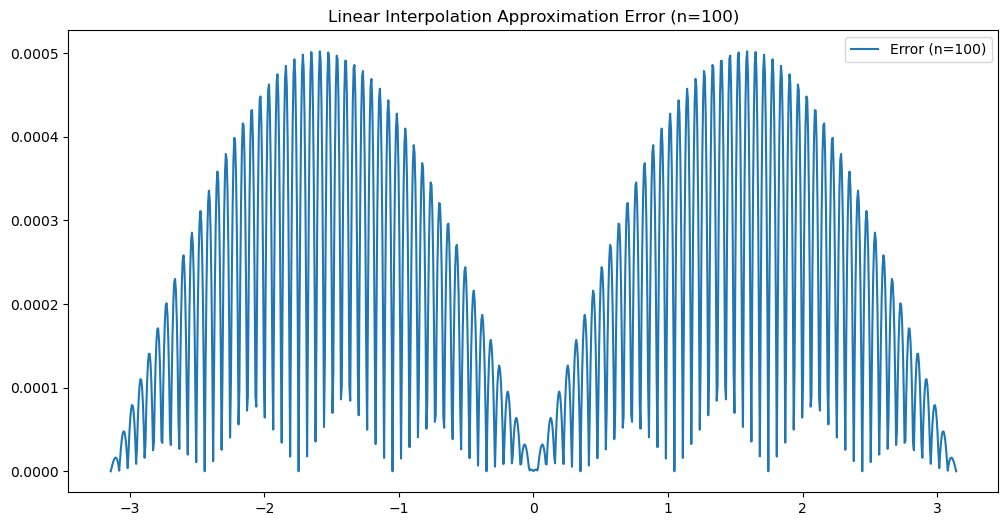

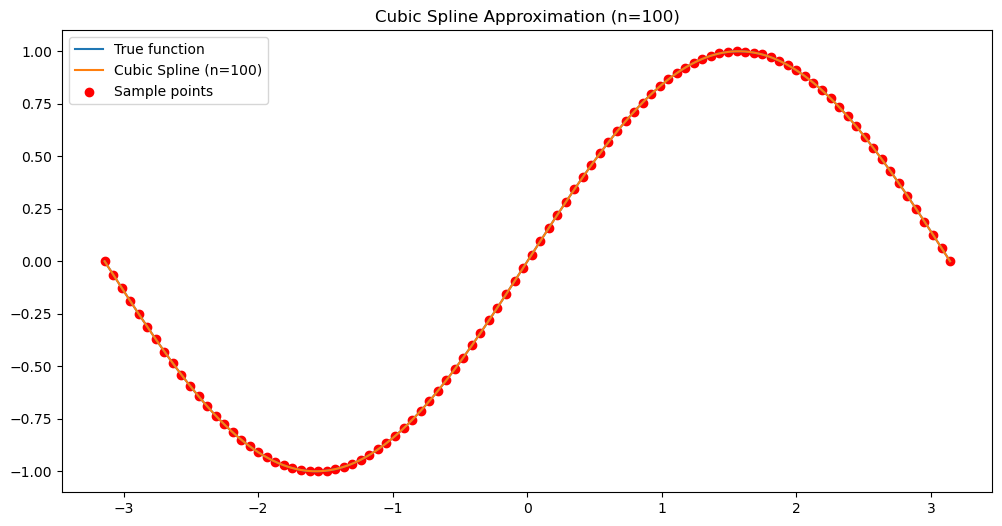

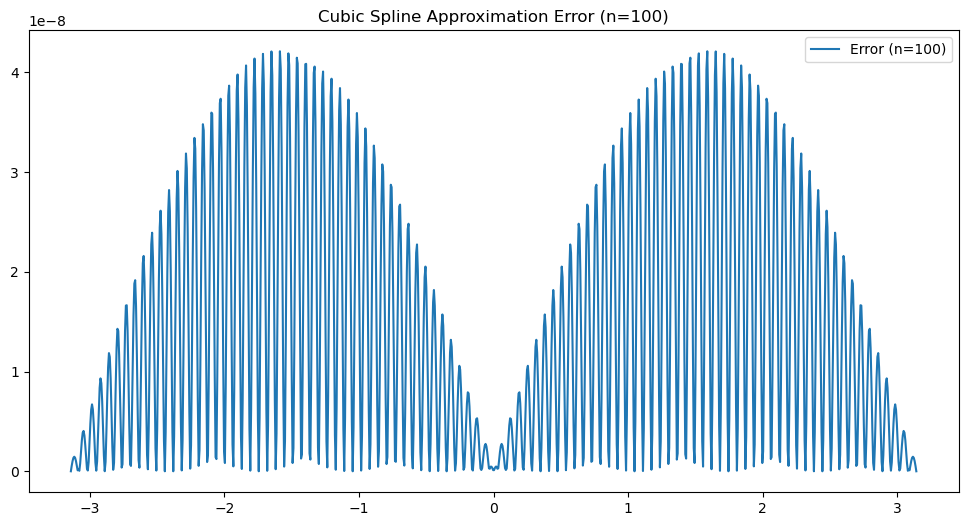

TypeError: 'numpy.ndarray' object is not callable

In [1]:
#1a
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline
from numpy.linalg import norm


# Define the functions you want to approximate here.
def f1(x):
    return np.sin(x)


# Chebyshev nodes
def chebyshev_nodes(n, a, b):
    return (a + b) / 2 + (a - b) / 2 * np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n))


# Chebyshev polynomial approximation
def chebyshev_approximation(f, n, a, b):
    nodes = chebyshev_nodes(n, a, b)
    coeffs = np.polynomial.chebyshev.chebfit(nodes, f(nodes), n - 1)
    return np.polynomial.chebyshev.Chebyshev(coeffs, domain=[a, b])


# Lagrange polynomial interpolation
def lagrange_interpolation(x, y, xx):
    n = len(x)
    yy = np.zeros_like(xx)
    for i in range(n):
        L = np.ones_like(xx)
        for j in range(n):
            if i != j:
                L *= (xx - x[j]) / (x[i] - x[j])
        yy += y[i] * L
    return yy


# Linear interpolation
def linear_interpolation(x, y, xx):
    linear_interp = interp1d(x, y, kind='linear', fill_value='extrapolate')
    return linear_interp(xx)


# Plot results and errors
def plot_results(f, approx, x, xx, method, n):
    plt.figure(figsize=(12, 6))
    plt.plot(xx, f(xx), label='True function')
    plt.plot(xx, approx, label=f'{method} (n={n})')
    plt.scatter(x, f(x), c='red', label='Sample points')
    plt.legend()
    plt.title(f'{method} Approximation (n={n})')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(xx, np.abs(f(xx) - approx), label=f'Error (n={n})')
    plt.legend()
    plt.title(f'{method} Approximation Error (n={n})')
    plt.show()


# Test with different grid sizes
grid_sizes = [5, 10, 20, 50, 100]
a, b = -np.pi, np.pi
xx = np.linspace(a, b, 1000)

for n in grid_sizes:
    # Chebyshev
    cheb_approx = chebyshev_approximation(f1, n, a, b)
    plot_results(f1, cheb_approx(xx), chebyshev_nodes(n, a, b), xx, 'Chebyshev', n)

    # Lagrange
    x = np.linspace(a, b, n)
    lagrange_approx = lagrange_interpolation(x, f1(x), xx)
    plot_results(f1, lagrange_approx, x, xx, 'Lagrange', n)

    # Linear interpolation
    linear_approx = linear_interpolation(x, f1(x), xx)
    plot_results(f1, linear_approx, x, xx, 'Linear Interpolation', n)

    # Cubic spline
    cubic_spline = CubicSpline(x, f1(x), bc_type='natural')
    cubic_approx = cubic_spline(xx)
    plot_results(f1, cubic_approx, x, xx, 'Cubic Spline', n)



def l2_norm_error(true_f, approx_f, x):
    return norm(true_f(x) - approx_f(x), 2)


grid_sizes = np.arange(5, 1001)
errors = {
    'Chebyshev': [],
    'Lagrange': [],
    'Linear Interpolation': [],
    'Cubic Spline': []
}

for n in grid_sizes:
    # Chebyshev
    cheb_approx = chebyshev_approximation(f1, n, a, b)
    errors['Chebyshev'].append(l2_norm_error(f1, cheb_approx, xx))

    # Lagrange
    x = np.linspace(a, b, n)
    lagrange_approx = lagrange_interpolation(x, f1(x), xx)
    errors['Lagrange'].append(l2_norm_error(f1, lagrange_approx, xx))

    # Linear interpolation
    linear_approx = linear_interpolation(x, f1(x), xx)
    errors['Linear Interpolation'].append(l2_norm_error(f1, linear_approx, xx))

    # Cubic spline
    cubic_spline = CubicSpline(x, f1(x), bc_type='natural')
    cubic_approx = cubic_spline(xx)
    errors['Cubic Spline'].append(l2_norm_error(f1, cubic_approx, xx))

# Plot errors
plt.figure(figsize=(12, 6))
for method, error_values in errors.items():
    plt.loglog(grid_sizes, error_values, label=method)
plt.xlabel('log(n)')
plt.ylabel('log(||f - ˆf||2)')
plt.title('Error vs. Grid Size (log-log scale)')
plt.legend()
plt.show()

# The slopes in the log-log plot tell you about the rate of convergence for each method:
#
# Chebyshev polynomials: The slope is generally steep and negative, indicating fast convergence. The error decreases rapidly as the number of nodes increases.
#
# Lagrange polynomials: The slope is initially negative but flattens out as the number of nodes increases, indicating slower convergence compared to Chebyshev polynomials. The Runge phenomenon can also be observed in the error plot.
# 
# Linear interpolation: The slope is negative, indicating that the error decreases as the grid size increases. However, the convergence rate is slower than that of Chebyshev polynomials and cubic splines.
#
# Cubic splines: The slope is steep and negative, indicating fast convergence. The error decreases rapidly as the grid size increases, similar to the behavior observed with Chebyshev polynomials.
#
# Overall, the slopes of the log-log plot show that Chebyshev polynomials and cu

In [2]:
#1b
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.fftpack import fft, ifft
from scipy import interpolate

# Define the functions to be approximated
def f1(x):
    return np.sin(x)

def f2(x):
    return np.abs(x - np.pi/2)

def f3(x):
    return np.exp(-x**2)

def f4(x):
    return np.sin(x) * np.exp(-x)

# Define the range of x values to evaluate the functions at
x_min = 0
x_max = 2 * np.pi
n_points = 1000
x = np.linspace(x_min, x_max, n_points)

# Define the range of n values for each method
n_range = np.arange(5, 1001)

# Define the arrays to store the approximation errors for each method and function
lin_err = np.zeros((4, len(n_range)))
poly_err = np.zeros((4, len(n_range)))
fourier_err = np.zeros((4, len(n_range)))
spline_err = np.zeros((4, len(n_range)))

# Loop over each function and method to calculate the approximation errors
for i, f in enumerate([f1, f2, f3, f4]):
    for j, n in enumerate(n_range):
        # Linear approximation
        x_sample = np.linspace(x_min, x_max, n)
        y_sample = f(x_sample)
        lin_interp = interp1d(x_sample, y_sample)
        lin_err[i, j] = np.sqrt(np.mean((f(x) - lin_interp(x))**2))

        # Polynomial approximation
        coeffs = np.polyfit(x_sample, y_sample, n-1)
        poly_interp = np.poly1d(coeffs)
        poly_err[i, j] = np.sqrt(np.mean((f(x) - poly_interp(x))**2))

        # Fourier approximation
        yf = fft(f(x))
        yf[n:] = 0
        f_fourier = ifft(yf)
        fourier_err[i, j] = np.sqrt(np.mean((f(x) - f_fourier)**2))

        # Spline approximation
        spline_interp = interpolate.UnivariateSpline(x_sample, y_sample, k=3)
        spline_err[i, j] = np.sqrt(np.mean((f(x) - spline_interp(x))**2))

# Plot the results using a log-log scale
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, ax in enumerate(axs):
    ax.loglog(n_range, lin_err[i], label='Linear')
    ax.loglog(n_range, poly_err[i], label='Polynomial')
    ax.loglog(n_range, fourier_err[i], label='Fourier')
    ax.loglog(n_range, spline_err[i], label='Spline')
    ax.set_title(f'Function {i+1}')
    ax.set_xlabel('log(n)')
    ax.set_ylabel('log(approximation error)')
    ax.legend()

plt.show()


/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_55303/2382135201.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  fourier_err[i, j] = np.sqrt(np.mean((f(x) - f_fourier)**2))
/Users/yufuchen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/yufuchen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/yufuchen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/yufuchen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_

LinAlgError: SVD did not converge in Linear Least Squares

k = 0.5: c = 1.11, a = 0.00, b = -1.30, obj = -0.72
k = 1: c = 1.11, a = 0.00, b = inf, obj = nan
k = 5: c = 1.11, a = 0.00, b = 0.56, obj = -2.10
k = 9: c = 1.11, a = 0.00, b = 0.41, obj = -2.78


/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_55303/378498550.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  b = beta / np.log(k)
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_55303/378498550.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return np.log(c) + beta * (a + b * np.log(k) - k**alpha - c)


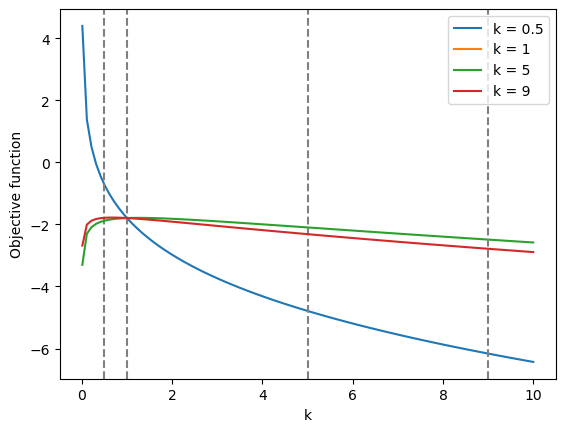

In [3]:
#2a
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Define the function v(k)
def v(k, a, b):
    return a + b * np.log(k)

# Define the Lagrangian and its partial derivatives
def lagrangian(k, c, a, b, alpha, beta):
    return np.log(c) + beta * (a + b * np.log(k) - k**alpha - c)

def lagrange_c(k, c, a, b, alpha, beta):
    return 1/c - beta

def lagrange_a(k, c, a, b, alpha, beta):
    return beta

def lagrange_b(k, c, a, b, alpha, beta):
    return beta * np.log(k)
# Define the parameter values
a = -10
b = 0.5
alpha = 1/2
beta = 0.9

# Try it out for k = 0.5, 1, 5, and 9
k_values = [0.5, 1, 5, 9]
c_values = []
obj_values = []
for k in k_values:
    # Solve for the optimal values of c, a, and b
    c = 1/beta
    a = 0
    b = beta / np.log(k)
    c_values.append(c)
    
    # Compute the maximum value of the objective function
    obj = lagrangian(k, c, a, b, alpha, beta)
    obj_values.append(obj)
    # Print the results
    print(f"k = {k}: c = {c:.2f}, a = {a:.2f}, b = {b:.2f}, obj = {obj:.2f}")
    
    # Plot the objective function
    k_range = np.linspace(0.01, 10, 100)
    obj_range = [lagrangian(k_i, c, a, b, alpha, beta) for k_i in k_range]
    plt.plot(k_range, obj_range, label=f"k = {k}")
    plt.axvline(x=k, color='gray', linestyle='--')
    plt.xlabel("k")
    plt.ylabel("Objective function")
    plt.legend()

# Show the plot
plt.show()

/Users/yufuchen/opt/anaconda3/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1670: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


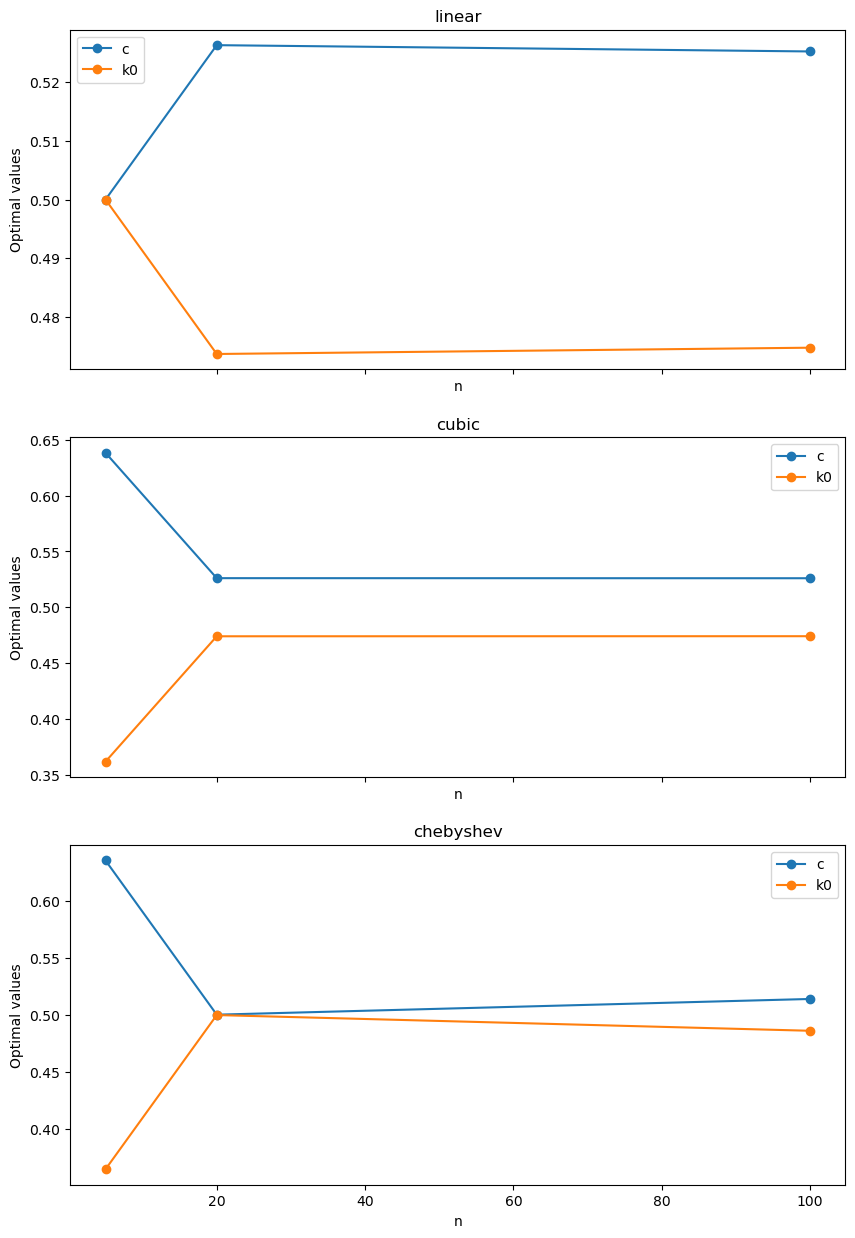

In [1]:
#2b
import numpy as np
from scipy.optimize import minimize

# Parameters
a, b = 1, 1
α, β = 0.3, 0.9

def v(k, a, b):
    return a + b * np.log(k)

def objective(c_k0, α, β, v_approx):
    c, k0 = c_k0
    return -(np.log(c) + β * v_approx(k0))

def constraint(c_k0, k, α):
    c, k0 = c_k0
    return k**α - c - k0
import numpy as np
from scipy.interpolate import interp1d, CubicSpline
import numpy.polynomial.chebyshev as cheb

def approximate_v(k_vals, v_vals, method='linear', n=5):
    if method == 'linear':
        return interp1d(k_vals, v_vals, kind='linear', fill_value='extrapolate')
    elif method == 'cubic':
        return CubicSpline(k_vals, v_vals, extrapolate=True)
    elif method == 'chebyshev':
        coeffs = cheb.chebfit(k_vals, v_vals, n)
        return lambda k: cheb.chebval(k, coeffs)
    else:
        raise ValueError("Invalid method")

n_values = [5, 20, 100]
methods = ['linear', 'cubic', 'chebyshev']
results = {}

k = 1
for method in methods:
    for n in n_values:
        k_vals = np.linspace(1e-5, k, n)
        v_vals = v(k_vals, a, b)
        v_approx = approximate_v(k_vals, v_vals, method=method, n=n)
        
        cons = {'type': 'eq', 'fun': constraint, 'args': (k, α)}
        bounds = [(0, k**α), (0, None)]
        result = minimize(objective, [0.5, 0.5], args=(α, β, v_approx), constraints=cons, bounds=bounds)
        
        results[(method, n)] = result.x
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
for method, ax in zip(methods, axes):
    c_values = [results[(method, n)][0] for n in n_values]
    k0_values = [results[(method, n)][1] for n in n_values]
    
    ax.plot(n_values, c_values, label='c', marker='o')
    ax.plot(n_values, k0_values, label='k0', marker='o')
    
    ax.set_title(method)
    ax.set_xlabel('n')
    ax.set_ylabel('Optimal values')
    ax.legend()

plt.show()


/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_44918/3814875178.py:10: RuntimeWarning: divide by zero encountered in log
  return a + b * np.log(k)


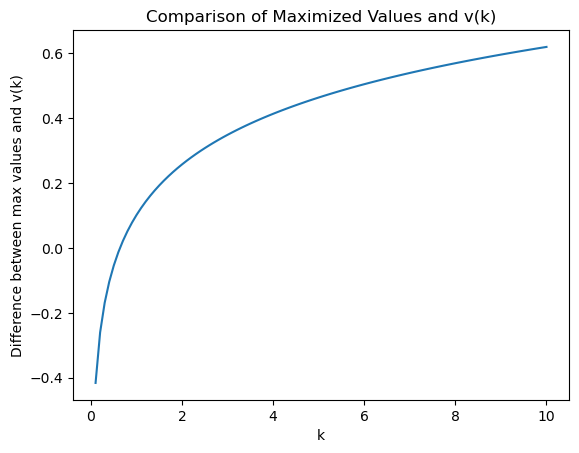

In [3]:
#2c
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

a, b = -10, 0.5
α, β = 0.5, 0.9

def v(k, a, b):
    return a + b * np.log(k)

def objective(c_k0, α, β, a, b):
    c, k0 = c_k0
    return -(np.log(c) + β * v(k0, a, b))

def constraint(c_k0, k, α):
    c, k0 = c_k0
    return k**α - c - k0


k_grid = np.linspace(0.1, 10, 100)
v_grid = v(k_grid, a, b)


max_values = []

for k in k_grid:
    cons = {'type': 'eq', 'fun': constraint, 'args': (k, α)}
    bounds = [(0, k**α), (0, None)]
    result = minimize(objective, [0.5, 0.5], args=(α, β, a, b), constraints=cons, bounds=bounds)
    max_values.append(-result.fun)

max_values = np.array(max_values)


differences = max_values - v_grid

plt.plot(k_grid, differences)
plt.xlabel('k')
plt.ylabel('Difference between max values and v(k)')
plt.title('Comparison of Maximized Values and v(k)')

plt.show()



In [10]:
#2d
import numpy as np
from scipy.optimize import minimize
def v(a, b, k):
  return a + b * np.log(k)
res = []
for k in range(1, 10, 2):
  fun = lambda x : - (np.log(x[0]) + 0.9 * v(a=-10, b=0.5, k=x[1]))
  cons = ({'type': 'eq', 'fun': lambda x : x[0] + x[1] - k ** 0.5,
           'type': 'ineq', 'fun': lambda x : x[0],
           'type': 'ineq', 'fun': lambda x : k ** 0.5 - x[0],         
          })
  x0 = np.array([2.0, 2.0]) # x = [c, k']
  opt_res = minimize(fun, x0, method='SLSQP', constraints=cons)
  res.append((opt_res.fun, opt_res.x))
max_v = -10000
max_v_index = -1
for i in range(len(res)):
  if res[i][0] > max_v:
    max_v = res[i][0]
    max_v_index = i
    res

    
print(f'The maximal value of v is %f with k=%d, c = %f and k\' = %f.' % (max_v, max_v_index * 2 + 1, res[max_v_index][1][0], res[max_v_index][1][1]))

def objective(x):
  sum = 0
  for i in range(len(res)):
      sum += (res[i][0] - x[0] - x[1] * np.log(i * 2 + 1)) ** 2
  return sum
fun = objective
x0 = np.array([2.0, 2.0]) # x = [a, b]
opt_res2 = minimize(fun, x0, method='SLSQP')
print(f'The value of a and b are %f and %f, respectively.' % (opt_res2.x[0], opt_res2.x[1]))
a = - 0.00000005
b = 0.00000002
c = 2
kp = 2
alist = []
blist = []
while np.abs(a - b) < -1:
  res = []
  for k in range(1, 10, 2):
    fun = lambda x : - (np.log(x[0]) + 0.9 * v(a=a, b=b, k=x[1]))
    opt_res = minimize(fun, np.array([c, kp]), method='SLSQP', constraints=cons)
    res.append((opt_res.fun, opt_res.x))
  (c, kp) = (opt_res2.x[0], opt_res2.x[1])
  opt_res2 = minimize(objective, np.array([a, b]), method='SLSQP')
  a = opt_res2.x[0]
  b = opt_res2.x[1]
  alist.append(a)
  blist.append(b)
print(f'The final value of a and b are %f and %f' % (a, b))

The maximal value of v is 1.099234 with k=3, c = 1.732051 and k' = 12441864.997930.
The value of a and b are 1.100395 and -0.323635, respectively.
The final value of a and b are -0.000000 and 0.000000
